<a href="https://colab.research.google.com/github/imvignesh003/ImageClassification-DeepLearning/blob/main/ImageClassification_CIFAR_10_TechnoHacks_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
!apt install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/DataSets/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

 97% 695M/715M [00:06<00:00, 124MB/s]
100% 715M/715M [00:06<00:00, 116MB/s]


In [ ]:
!ls

cifar-10.zip  drive  sample_data


In [ ]:
!unzip  /content/cifar-10.zip -d /content

Archive:  /content/cifar-10.zip
  inflating: /content/sampleSubmission.csv  
  inflating: /content/test.7z        
  inflating: /content/train.7z       
  inflating: /content/trainLabels.csv  


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.3 MB/s eta 0:00:00


In [ ]:
import py7zr

arch = py7zr.SevenZipFile('/content/train.7z',mode='r')
arch.extractall()
arch.close()

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train')

Label Preprocessing

In [ ]:
labels = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels.shape

(50000, 2)

In [ ]:
labels.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [ ]:
labels_dict = {'airplane':0, 'automobile':1,'bird':2, 'cat':3, 'deer':4, 'dog':5,'frog':6,'horse':7, 'ship':8,'truck':9}

In [ ]:
labels_list = [labels_dict[i] for i in labels['label']]

In [ ]:
labels['label'] = labels_list

In [ ]:
labels.head()

,id,label
0,1,6
1,2,9
2,3,9
3,4,4
4,5,1


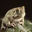

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/10002.png')
cv2_imshow(img)

Image Processing

In [ ]:
#convert images to numpy arrays
folder = '/content/train/'


data = []

for id in labels_list:
  image = Image.open(folder+str(id+1)+'.png')
  image = np.array(image)
  data.append(image)

len(data)

50000

In [ ]:
data[0].shape

(32, 32, 3)

In [ ]:
data[0]

array([[[164, 206,  84],
        [105, 140,  61],
        [118, 148, 101],
        ...,
        [109, 147,  73],
        [108, 147,  69],
        [ 91, 129,  57]],

       [[167, 213,  84],
        [116, 160,  49],
        [ 72, 109,  43],
        ...,
        [105, 142,  79],
        [105, 142,  72],
        [ 89, 127,  57]],

       [[140, 191,  65],
        [142, 193,  66],
        [119, 163,  79],
        ...,
        [104, 139,  84],
        [ 84, 120,  58],
        [ 78, 115,  49]],

       ...,

       [[139, 148,  81],
        [142, 155,  74],
        [135, 156,  72],
        ...,
        [ 89, 134,  28],
        [ 97, 148,  24],
        [126, 176,  49]],

       [[163, 157,  85],
        [153, 164,  82],
        [146, 164,  90],
        ...,
        [ 85, 130,  19],
        [ 98, 148,  27],
        [127, 178,  48]],

       [[183, 153, 102],
        [176, 182, 116],
        [154, 154, 100],
        ...,
        [ 94, 134,  29],
        [ 91, 133,  26],
        [122, 170,  44]]

In [ ]:
#convert images and labels to numpy arrays
x = np.array(data)
y = np.array(labels_list)

Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=2)

Scale down 0 - 255 to 0 - 1

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train_scaled[0]

array([[[0.10980392, 0.09803922, 0.03921569],
        [0.14509804, 0.13333333, 0.0745098 ],
        [0.14901961, 0.1372549 , 0.07843137],
        ...,
        [0.29803922, 0.2627451 , 0.15294118],
        [0.31764706, 0.28235294, 0.16862745],
        [0.33333333, 0.29803922, 0.18431373]],

       [[0.12941176, 0.10980392, 0.05098039],
        [0.13333333, 0.11764706, 0.05490196],
        [0.1254902 , 0.10588235, 0.04705882],
        ...,
        [0.37254902, 0.32156863, 0.21568627],
        [0.37647059, 0.32156863, 0.21960784],
        [0.33333333, 0.28235294, 0.17647059]],

       [[0.15294118, 0.1254902 , 0.05882353],
        [0.15686275, 0.12941176, 0.06666667],
        [0.22352941, 0.19607843, 0.12941176],
        ...,
        [0.36470588, 0.29803922, 0.20392157],
        [0.41960784, 0.34901961, 0.25882353],
        [0.37254902, 0.30196078, 0.21176471]],

       ...,

       [[0.3254902 , 0.28627451, 0.20392157],
        [0.34117647, 0.30196078, 0.21960784],
        [0.32941176, 0

Building Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_classes = 10

#setting up layers of neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
model.fit(x_train_scaled,y_train,validation_split=0.1,epochs = 2)

Epoch 1/2
1125/1125 [==============================] - 6s 3ms/step - loss: 0.0162 - acc: 0.9969 - val_loss: 1.4900e-04 - val_acc: 1.0000
Epoch 2/2
1125/1125 [==============================] - 3s 3ms/step - loss: 7.8212e-05 - acc: 1.0000 - val_loss: 3.9968e-05 - val_acc: 1.0000


**ResNet50**

In [ ]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model,Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [ ]:
cnn_base = ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))
# cnn_base.summary()

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model = models.Sequential()

model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))

model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())

model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())

model.add(layers.Dense(num_classes,activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(x_train_scaled,y_train, validation_split=0.1 , epochs=1)

 401/1125 [=========>....................] - ETA: 4:30 - loss: 0.2285 - acc: 0.9597

In [ ]:
loss, accuracy = model.evaluate(x_test_scaled,y_test)
print('Test Accuracy = ',accuracy)

In [ ]:
h = history

#plot loss function value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='train loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='train accuracy')
plt.legend()
plt.show()

In [ ]:
# prompt: plot the loss function value and accuracy function value from history this is not working

h = history
#plot loss function value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='train loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='train accuracy')
plt.legend()
plt.show()
